# Investigación sobre K-means

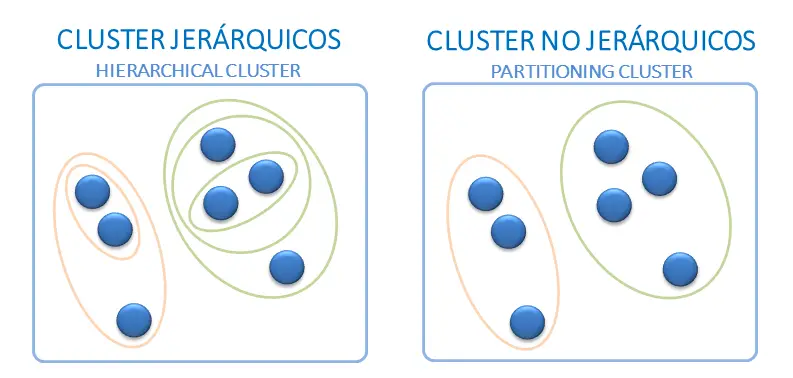

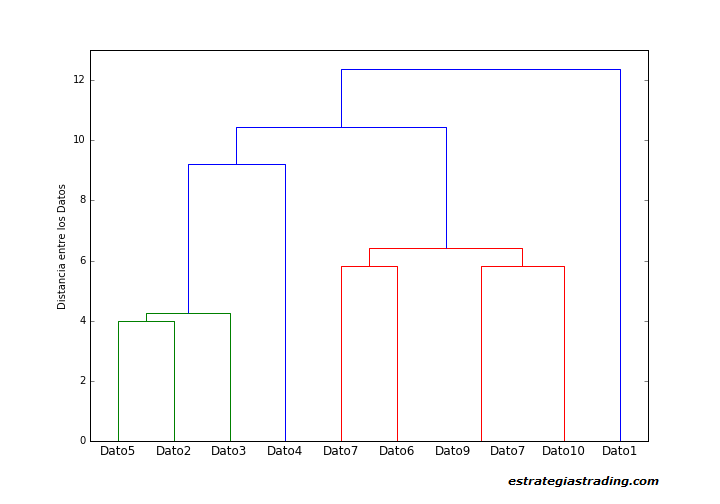

En resumen, el algoritmo de k-means, utiliza k número de centroides para agrupar los datos a su centroide más cercano.

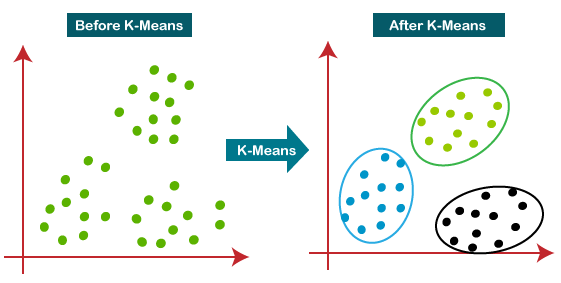

## Palabras clave:

- cluster: colección de datos agrupados debido a similitudes.
- k: número de centroides que se usarán para definir los clústeres.

## Método de funcionamiento 

1. Elegir el número de clusters k: el primer paso en k-means es elegir el número de clusters, k. Se entrará más a detalle sobre este punto en el siguiente inciso de la tarea.

2. Seleccionar k puntos aleatorios de los datos como centroides: a continuación, se seleccionan aleatoriamente k centroides. Suponiendo que se quieren tener 2 conglomerados, k será igual a 2 en este caso.

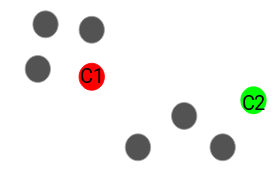

3. Asignar todos los puntos al centroide del cluster más cercano: una vez inicializados los centroides, se asigna cada punto al centroide más cercano. Esto, por medio del cálculo de la distancia entre cada uno de los puntos y cada uno de los centroides. Una vez con estos valores, se asigna el punto al centroide con el que se haya calculado la menor distancia.

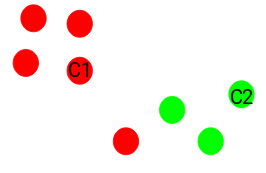

4. Recalcular los centroides de los clusters recién formados: ahora, una vez que se han asignado todos los puntos a uno u otro cluster, el siguiente paso es calcular los centroides de los clusters recién formados. Esto se logra obteniendo el promedio de cada uno de los clusters, el cual puede o no coincidir con el centroide anteriormente definido. En caso de que no coincida, ese nuevo punto, que es el promedio de todos los puntos del cluster, se convierte en el nuevo centroide.

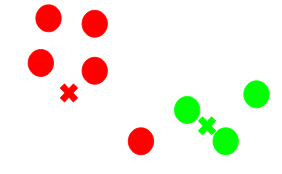

5. Repetir los pasos 3 y 4.

Finalmente, para poder definir una condición que termine el algoritmo, existen tres criterios de parada que pueden adoptarse:

1. Los centroides de los clusters recién formados no cambian.
2. Los puntos permanecen en el mismo cluster.
3. Se alcanza el número máximo de iteraciones.

Por motivos de simplicidad, en esta tarea se utilizará el método 3: se alcanza el máximo número de iteraciones.

## Aplicaciones 

- Clasificación de documentos: se basa en tags, temas y contenido de los documentos.
- Identificación de zonas con alta criminalidad: observa la categroría del crimen así como la ubicación.
- Detección de fruades en aseguradoras: observa datos pasados y los compara con datos nuevos, para saber su cercanía a clusters con patrones fraudulentos.

## Desventajas 

- El número de clusters tiene que ser definido antes de comenzar el algoritmo.
- El algoritmo puede dar resultados diferentes en cada una de las veces que se corra, debido a la selección incial aleatoria de clusters. 
- Es pesado, computacionalmente. 
- Asume que los clusters tienen una forma circular, no puede trabajar con otras formas.

# Implementación propietaria

Importaciones para poder llevar acabo la implementación propietaria del algoritmo

In [28]:
import matplotlib.pyplot as plt
import random
import math
import matplotlib.colors as mcolors
import os

Constantes importantes para la implementación:

- `GIF_DIR` es el directorio donde se va a guardar el gif de la animación. 
- `ITERATIONS` es el número de iteraciones que se llevarán acabo.
- `CLUSTERS` es el número de secciones en las que se dividirá la nube de puntos.

In [29]:
GIF_DIR = os.path.join("media")
ITERATIONS = 10
CLUSTERS = 2

Tipos customizados para facilitar la codificación del algoritmo:

- `Coordinate` hace referencia la unión de dos valores flotantes que conforman un punto 2D en el espacio.

In [30]:
Coordinate = tuple[float, float]

Función para generar una nube de puntos semi aleatoria. Primero se definen un par de puntos iniciales. Seguidamente, tomando en cuenta el número de puntos que se desean generar, se itera esa cantidad de veces y, en cada iteración, se genera un ángulo aleatorio con una longitud aleatoria entre 0 y `max_len`. Con esto se generan todos los puntos alrededor de los 2 puntos originales.

In [31]:
def generate_random_point_cloud() -> tuple[list[float], list[float]]:
    x_1, y_1, x_2, y_2 = 0, 0, 10, 10
    no_points: int = 200
    x_values: list[float] = []
    y_values: list[float] = []
    max_len: float = 8

    for _ in range(no_points):
        theta = random.randint(0, 361)
        len = random.random() * max_len
        x_values.append(x_1 + len * math.cos(math.radians(theta)))
        y_values.append(y_1 + len * math.sin(math.radians(theta)))

        theta = random.randint(0, 361)
        len = random.random() * max_len
        x_values.append(x_2 + len * math.cos(math.radians(theta)))
        y_values.append(y_2 + len * math.sin(math.radians(theta)))

    return x_values, y_values

Función para generar una lista de centroides al azar. Toma los valores en `x` y `y` y selecciona una cantidad `k` de coordenadas al azar, las agrega a la lista de centroides y lo devuelve.

In [32]:
def generate_random_centroids(
    x_values: list[float], y_values: list[float], k: int
) -> list[Coordinate]:
    centroids: list[Coordinate] = []
    random_indices: list[int] = random.sample([i for i in range(len(x_values))], k)
    for i in random_indices:
        centroids.append((x_values[i], y_values[i]))
    return centroids

Función encargada de generar una gráfica en la que se muestre la nube de puntos, con cada punto representado con un color perteneciente al centroide que tiene más cercano. De igual manera, se muestra una `+` en el punto en el que se encuentra el centroide en cada gráfica. Finalmente, guarda las gráficas en un directorio definido por la constante explicada al principio del código. Esto es para, al terminar la ejecución del código, poder generar un gif con la secuencia de gráficas guardadas.

In [33]:
def plot_point_cloud_with_centroids(
    x_values: list[float],
    y_values: list[float],
    centroids: list[Coordinate],
    color_per_centroid: dict[Coordinate, str],
    closest_centroid_per_point: dict[Coordinate, Coordinate],
    iteration: int,
):
    plt.figure()
    for x, y in zip(x_values, y_values):
        closest_centroid = closest_centroid_per_point[(x, y)]
        plt.scatter(x, y, c=color_per_centroid[closest_centroid])
    for x, y in centroids:
        plt.scatter(x, y, c=color_per_centroid[(x, y)], marker="+", s=5_000)
    plt.title(f"Iteration: {iteration + 1}")
    plt.savefig(os.path.join(GIF_DIR, f"iteration-{str(iteration + 1).zfill(2)}"), dpi=300)
    plt.close()
    print(f"Saved image {iteration + 1}/{ITERATIONS}")

Función para generar un color aleatorio para cada uno de los centroides. Esto es para poder distinguirlos al momento de generar las gráficas. Funciona seleccionando una cantidad de colores aleatoriamente, dependiende de la cantidad de centroides que se le pasen. Seguidamente, forma un diccionario donde la llave es el centroide y el valor es el string que representa el color asignado.

In [ ]:
def generate_random_color_per_centroid(centroids: list[Coordinate]) -> dict[Coordinate, str]:
    random_colors = random.sample(list(mcolors.TABLEAU_COLORS.keys()), len(centroids))
    color_per_centroid: dict[Coordinate, str] = {}
    for centroid, color in zip(centroids, random_colors):
        color_per_centroid[centroid] = color
    return color_per_centroid

Función para obtener la distancia entre un par de coordenadas.

In [ ]:
def get_distance(point_1: Coordinate, point_2: Coordinate) -> float:
    return math.sqrt((point_2[0] - point_1[0]) ** 2 + (point_2[1] - point_1[1]) ** 2)

Función para relacionar cada uno de los puntos de la nube al centroide que tiene más cerca. Funciona iterando por cada uno de los puntos de la nube de puntos, calculando su distancia a cada uno de los centroides seleccionados, eligiendo el menor valor y, finalmente, agregando a un diccionario donde la llave es el punto de la nube de puntos y el valor es el centroide más cercano a ese punto.

In [36]:
def get_closest_centroid_per_point(
    x_values: list[float],
    y_values: list[float],
    centroids: list[Coordinate],
):
    closest_centroid_per_point: dict[Coordinate, Coordinate] = {}

    for x, y in zip(x_values, y_values):
        distance_per_centroid: dict[Coordinate, float] = {}

        for centroid in centroids:
            centroid_x, centroid_y = centroid
            distance_per_centroid[centroid] = get_distance((centroid_x, centroid_y), (x, y))

        closest_centroid = min(distance_per_centroid, key=lambda x: distance_per_centroid[x])
        closest_centroid_per_point[(x, y)] = closest_centroid

    return closest_centroid_per_point

Función para actualizar los centroides, es decir, moverlos al centro de los puntos asignados a cada centroide. Funciona, primero, creando un diccionario donde la llave es cada uno de los centroides originales y el valor es una lista de puntos, los cuales tienen al centroide de la llave como el más cercano. Seguidamente, se itera sobre los centroides originales y se crea una lista de valores en `x` y en `y`, en las cuales se ponen las componentes de cada uno de los puntos que tienen al centroide original como el más cercano. Con estos valores, se puede calcular el promedio en `x` y en `y`, valores que son, finalmente, las coordenadas del nuevo centroide. Al final, luego de iterar sobre los centroides originales, se devuelve una lista con los nuevos centroides.

In [37]:
def update_centroids(
    closest_centroid_per_point: dict[Coordinate, Coordinate],
    old_centroids: list[Coordinate],
) -> list[Coordinate]:
    new_centroids: list[Coordinate] = []
    points_per_centroid: dict[Coordinate, list[Coordinate]] = {}
    for point, centroid in closest_centroid_per_point.items():
        if centroid not in points_per_centroid:
            points_per_centroid[centroid] = []
        points_per_centroid[centroid].append(point)

    for centroid in old_centroids:
        x_values: list[float] = []
        y_values: list[float] = []
        for x, y in points_per_centroid[centroid]:
            x_values.append(x)
            y_values.append(y)
        new_centroids.append((sum(x_values) / len(x_values), sum(y_values) / len(y_values)))
    return new_centroids

Función para actualizar los colores y relacionarlos con su nuevo centroides. Funciona iterando, al mismo tiempo, sobre los centroides nuevos y los originales, para asegurar que el orden permanezca y los colores no cambien de grupo.

In [38]:
def update_colors_mapping(
    centroids: list[Coordinate],
    color_per_centroid: dict[Coordinate, str],
    old_centroids: list[Coordinate],
):
    new_color_per_centroid: dict[Coordinate, str] = {}

    for new_centroid, old_centroid in zip(centroids, old_centroids):
        new_color_per_centroid[new_centroid] = color_per_centroid[old_centroid]

    return new_color_per_centroid

Función principal, en la que se itera según lo definido en las constantes del grupo, llevan acabo los pases necesario. En resumen, el orden de cada iteración es el siguiente:

1. Generar o actualizar centroides
2. Generar o actualizar colores para cada centroide
3. Obtener el centroide más cercano para cada punto de la nube 
4. Generar la gráfica

In [ ]:
def main():
    x_values, y_values = generate_random_point_cloud()

    centroids = generate_random_centroids(x_values, y_values, CLUSTERS)
    color_per_centroid = generate_random_color_per_centroid(centroids)
    for i in range(ITERATIONS):
        closest_centroid_per_point = get_closest_centroid_per_point(x_values, y_values, centroids)
        plot_point_cloud_with_centroids(
            x_values, y_values, centroids, color_per_centroid, closest_centroid_per_point, i
        )

        if i == ITERATIONS - 1:
            break

        old_centroids = centroids.copy()
        centroids = update_centroids(closest_centroid_per_point, old_centroids)
        color_per_centroid = update_colors_mapping(centroids, color_per_centroid, old_centroids)

In [40]:
if __name__ == "__main__":
    main()

Saved image 1/10
Saved image 2/10
Saved image 3/10
Saved image 4/10
Saved image 5/10
Saved image 6/10
Saved image 7/10
Saved image 8/10
Saved image 9/10
Saved image 10/10


Para observar el comando para generar la animación, ver el archivo `media/generate_animation.sh`.

![](media/animation.gif)